Machine Learning project for Python Class: A neural network distinguishing cats and dogs
Creators: Michał Kloska, Jakub Zapaśnik, Daniel Lilla

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [75]:
from keras.preprocessing.image import load_img, img_to_array, image

In [26]:
#loading file names
import os

img_dir = r'C:\Users\Miszel\Desktop\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [27]:
full_images = [os.path.join(img_dir, img) for img in images]

In [28]:
full_images[:3]

['C:\\Users\\Miszel\\Desktop\\train\\cat.0.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.1.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.10.jpg']

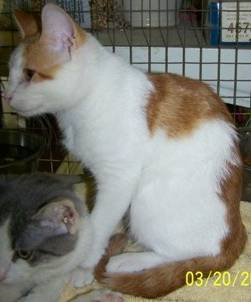

In [29]:
image_index = 6482
load_img(full_images[image_index])

In [30]:
#creating RGB layers for the model to detect colours
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

In [31]:
from imports_for_ML import load_images

x, y = load_images(img_dir, n_images=15000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [32]:
x.shape

(15000, 100, 100, 3)

In [33]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=42)

In [35]:
x_train.shape

(13500, 100, 100, 3)

In [36]:
x_test.shape

(1500, 100, 100, 3)

In [37]:
model = Sequential([
#first convolution layer, then max pooling
Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((3,3)),
BatchNormalization(),
Dropout(0.1),
#next convolution layer, then max pooling
Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.2),
#last convolution layer, then maxpooling
Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.3),

#flattening and adding 64 ordinary neurons
Flatten(),
Dense(128, activation = 'relu'),
Dropout(0.5),

#last binary neuron outputting 1 or 0; dog or cat
Dense(1, activation='sigmoid')

])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
stop_early = EarlyStopping(patience = 4)
history = model.fit(x_train, y_train, epochs = 30, validation_split= 0.04, callbacks=[stop_early])

Epoch 1/30
405/405 [==============================] - 34s 83ms/step - loss: 0.9104 - accuracy: 0.6571 - val_loss: 0.4763 - val_accuracy: 0.7759
Epoch 2/30
405/405 [==============================] - 33s 82ms/step - loss: 0.5225 - accuracy: 0.7470 - val_loss: 0.4713 - val_accuracy: 0.7685
Epoch 3/30
405/405 [==============================] - 33s 80ms/step - loss: 0.4578 - accuracy: 0.7823 - val_loss: 0.4297 - val_accuracy: 0.7889
Epoch 4/30
405/405 [==============================] - 33s 82ms/step - loss: 0.4234 - accuracy: 0.8049 - val_loss: 0.4295 - val_accuracy: 0.7981
Epoch 5/30
405/405 [==============================] - 33s 82ms/step - loss: 0.3917 - accuracy: 0.8232 - val_loss: 0.3818 - val_accuracy: 0.8130
Epoch 6/30
405/405 [==============================] - 32s 79ms/step - loss: 0.3654 - accuracy: 0.8373 - val_loss: 0.3751 - val_accuracy: 0.8093
Epoch 7/30
405/405 [==============================] - 33s 82ms/step - loss: 0.3320 - accuracy: 0.8519 - val_loss: 0.4322 - val_accuracy:

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)      

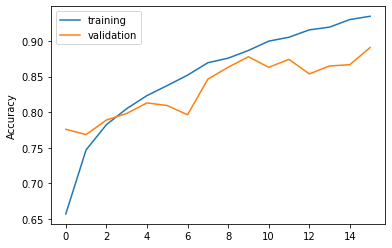

In [40]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

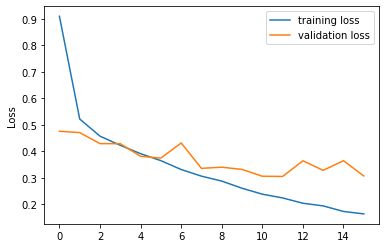

In [41]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel('Loss')
plt.legend()

In [42]:
train_corr = model.fit(x_train, y_train)

test_corr = model.fit(x_test, y_test)

47/47 [==============================] - 4s 81ms/step - loss: 0.4393 - accuracy: 0.8367


Accuracy on the training data:
422/422 [==============================] - 8s 19ms/step - loss: 0.1930 - accuracy: 0.9690
0.9690370559692383

Accuracy on the test data:
47/47 [==============================] - 1s 20ms/step - loss: 0.2575 - accuracy: 0.9193
0.9193333387374878


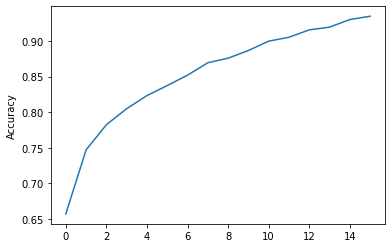

In [43]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(x_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(x_test, y_test)[1])

In [44]:
#first 25 test photos:
test_sample = x_test[:25]
predictions = model.predict(test_sample)
true_labels = y_test[:25]

C:\Users\Miszel\AppData\Local\Temp\ipykernel_7988\1771936233.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))


(-0.5, 99.5, 99.5, -0.5)

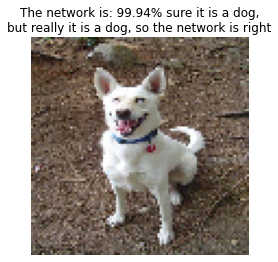

In [49]:
check_idx = 2
plt.imshow(test_sample[check_idx] / 255)

text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5

plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

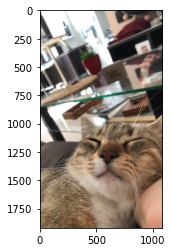

In [82]:
my_matcha = plt.imread(r'C:\Users\Miszel\Desktop\ML_TEST\Matcha_2.jpg')
plt.imshow(my_matcha)

In [94]:
matcha_test = img_to_array(my_matcha)
matcha_test.shape

(1920, 1080, 3)

In [95]:
matcha_test.reshape((100,100))

ValueError: cannot reshape array of size 6220800 into shape (100,100)

In [93]:
model.predict(matcha_test.reshape(100,100))

ValueError: cannot reshape array of size 6220800 into shape (100,100)